<a href="https://colab.research.google.com/github/asdfasdf0311/kaggle-1/blob/main/EDA_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**데이터탐색**

In [ ]:
#데이터 경로 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터로드
train = pd.read_csv('/content/drive/MyDrive/ydms/titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/ydms/titanic/test.csv')
survived = pd.read_csv('/content/drive/MyDrive/ydms/titanic/gender_submission.csv')

* info() = 데이터 변수 속성 확인
* head() = 앞부분 n행 확인
* tail() = 뒷부분 n행 확인
* describe() = 숫자형 데이터의 통계치를 계산해서 확인
* shape = 데이터의 행, 열의 크기 확인
* index = 데이터프레임의 인덱스 확인
* columns = 데이터프레임의 칼럼 명 확인
* dtypes = 데이터프레임 자료형 확인
* sort_values() = 데이터를 크기순으로 정렬하여 확인
* value_counts() = 데이터 빈도수 확인
* unique() = 칼럼의 고윳값 확인

In [ ]:
#변수 속성 및 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결과를 통해 알 수 있던 것
- 12개의 변수
- 총 891개의 데이터
- Age: 177건의 결측치, Cabin: 687건의 결측치, Embarked: 2건의 결측치

In [ ]:
#상위 5행 확인
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#통계치 확인
round(train.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [ ]:
#문자형 변수의 요약통계량 확인
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
cnt = train['Sex'].value_counts()
pd.DataFrame(cnt)

,Sex
male,577
female,314


In [ ]:
cnt1 = train['Embarked'].value_counts()
pd.DataFrame(cnt1)

,Embarked
S,644
C,168
Q,77


In [ ]:
cnt2 = train.groupby(['Sex','Embarked']).sum()
pd.DataFrame(cnt2)

<ipython-input-10-babe8eefad37>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cnt2 = train.groupby(['Sex','Embarked']).sum()


PassengerId  Survived  Pclass       Age  SibSp  Parch  \
Sex    Embarked                                                          
female C               31924        64     126   1729.00     40     36   
       Q               13469        27     104    291.50      8      8   
       S               89058       140     446   5165.50    170    160   
male   C               42896        29     191   2276.92     25     25   
       Q               18709         3     120    495.00     25      5   
       S              200438        77    1068  11147.25    198    106   

                      Fare  
Sex    Embarked             
female C         5487.3958  
       Q          454.8585  
       S         7864.4085  
male   C         4584.9004  
       Q          567.3958  
       S         9574.9903

In [ ]:
#각 변수의 왜도 확인 -> 데이터분포의 좌우 비대칭도를 표현하는 척도(즉, 분포가 얼마나 대칭이 아닌지)
#한쪽으로 심하게 몰려 있으면 왜도값 증가
train.skew()

<ipython-input-11-10c92ed1d2e1>:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [ ]:
#각 변수의 첨도 확인 -> 분포가 정규분포보다 얼마나 뾰족하거나 완만한지의 정도를 나타내는 척도(즉, 중심에 얼마나 집중적으로 쏠려있는가)
#기본적으로 3이 기준값
train.kurtosis()

<ipython-input-39-fc24bc4475ea>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.kurtosis()


PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

### **시각화**

<Axes: ylabel='Survived'>

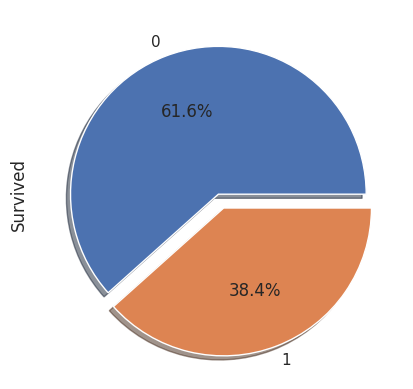

In [ ]:
train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',shadow=True)

61.8%가 사망하였고, 38.4%가 생존하였음을 알 수 있다.

<Axes: xlabel='Sex', ylabel='count'>

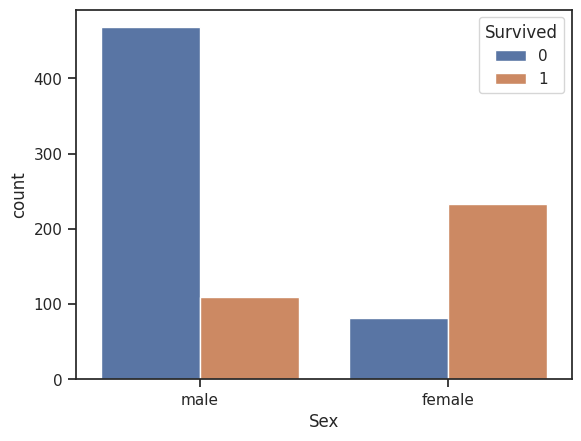

In [ ]:
sns.countplot(x='Sex',hue='Survived',data=train)

남성은 생존한 사람보다 생존하지 못한 사람이 4배가 넘는 반면에, 여성은 생존한사람이 생존하지 못한사람보다 2배 이상 많았다.

<Axes: xlabel='Sex', ylabel='Age'>

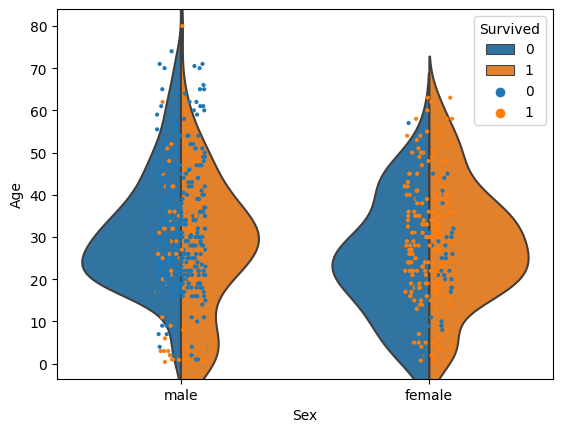

In [ ]:
#생존여부에 따른 나이(violinplot)
sns.violinplot(x="Sex", y='Age', data=train, hue="Survived", inner=None,split=True)
sns.stripplot(x='Sex', y='Age', data=train, hue="Survived", size=3)

이 그래프에서도 대체적으로 남성에 비해 여성이 많이 생존하였음을 볼 수 있었다.

젊은 남성(20-30대)일수록 사망률이 높았고, 30-40대 여성일수록 생존률이 높았다.

그러나, 0-10세의 어린 남자 아이들은 대부분 생존하였음을 볼 수 있다.

<Axes: xlabel='Pclass', ylabel='Age'>

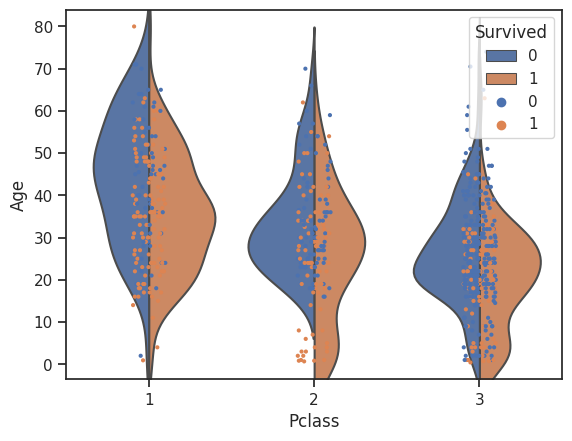

In [ ]:
#객실별 생존여부(violinplot)
sns.violinplot(x="Pclass", y='Age', data=train, hue="Survived", inner=None,split=True)
sns.stripplot(x='Pclass', y='Age', data=train, hue="Survived", size=3)

1등급 객실의 30-40대 여성이 생존을 많이 하였고, 2-3등급객실의 20-30대 남성이 생존을 많이 하지 못했다.

생존자 중에는 여성이 더 많고, 사망자 중에는 남성이 더 많다.

In [ ]:
df_1 =  train[train['Survived']==1]#생존자dataframe
df_0 =  train[train['Survived']==0]#사망자dataframe

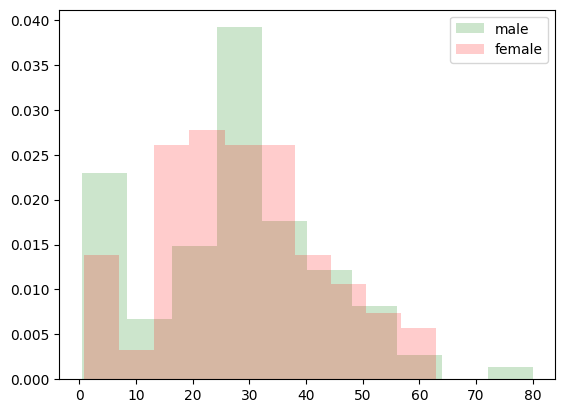

In [ ]:
#생존자와 성별,나이 KDE plot
df1_1 = df_1[df_1['Sex'].isin(['male'])]
df1_1 = df1_1[['Age']]
df1_2 = df_1[df_1['Sex'].isin(['female'])]
df1_2 = df1_2[['Age']]

plt.hist(df1_1, color='green', alpha = 0.2, bins=10, label = 'male', density=True)
plt.hist(df1_2, color='red', alpha = 0.2, bins=10, label = 'female', density=True)
plt.legend()
plt.show()

20-30대의 여성과 어린 남자아이, 20대 중후반 남성이 가장 많이 생존하였다.

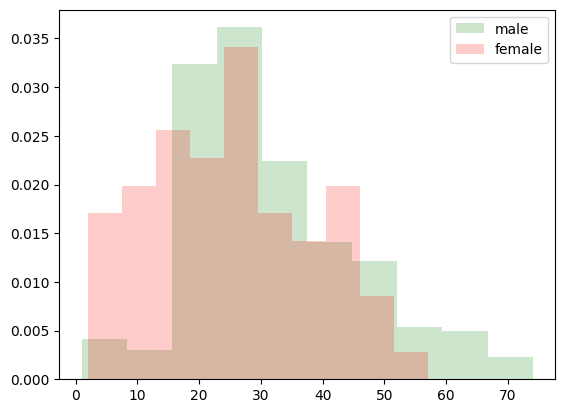

In [ ]:
#사망자와 성별,나이 KDE plot
df0_1 = df_0[df_0['Sex'].isin(['male'])]
df0_1 = df0_1[['Age']]
df0_2 = df_0[df_0['Sex'].isin(['female'])]
df0_2 = df0_2[['Age']]

plt.hist(df0_1, color='green', alpha = 0.2, bins=10, label = 'male', density=True)
plt.hist(df0_2, color='red', alpha = 0.2, bins=10, label = 'female', density=True)
plt.legend()
plt.show()

여기서도 20-30대의 남성 사망자가 가장 많음을 알 수 있다.

여성은 0-20대까지의 사망자가 많다.

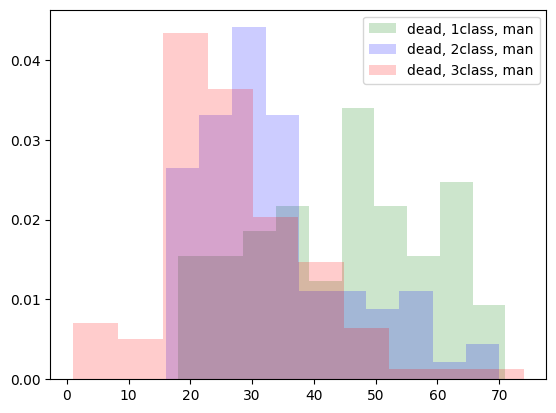

In [ ]:
#남성 사망자 등급별 나이분포
df_0_male = df_0[df_0['Sex']=="male"]#사망자 중 남성 dataframe
df_0_male_1 = df_0_male[df_0_male['Pclass'].isin([1])]#사망자 중 남성이고 1등급 객실 dataframe
df_0_male_1 = df_0_male_1[['Age']]
df_0_male_2 = df_0_male[df_0_male['Pclass'].isin([2])]#사망자 중 남성이고 2등급 객실 dataframe
df_0_male_2 = df_0_male_2[['Age']]
df_0_male_3 = df_0_male[df_0_male['Pclass'].isin([3])]#사망자 중 남성이고 3등급 객실 dataframe
df_0_male_3 = df_0_male_3[['Age']]


plt.hist(df_0_male_1, color='green', alpha = 0.2, bins=10, label = 'dead, 1class, man', density=True)
plt.hist(df_0_male_2, color='blue', alpha = 0.2, bins=10, label = 'dead, 2class, man', density=True)
plt.hist(df_0_male_3, color='red', alpha = 0.2, bins=10, label = 'dead, 3class, man', density=True)
plt.legend()
plt.show()

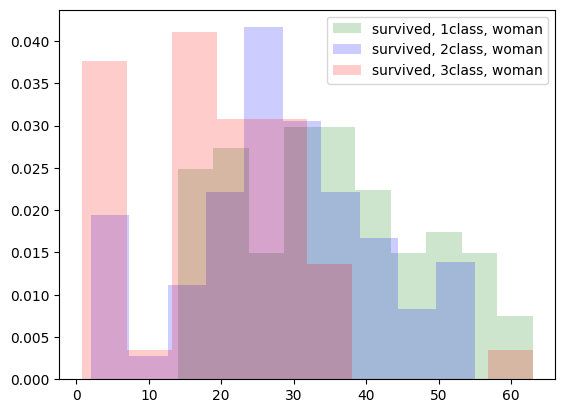

In [ ]:
#여성 생존자 등급별 나이분포
df_1_female = df_1[df_1['Sex']=="female"]#생존자 중 여성 dataframe
df_1_female_1 = df_1_female[df_1_female['Pclass'].isin([1])]#생존자 중 여성이고 1등급 객실 dataframe
df_1_female_1 = df_1_female_1[['Age']]
df_1_female_2 = df_1_female[df_1_female['Pclass'].isin([2])]#생존자 중 여성이고  2등급 객실 dataframe
df_1_female_2 = df_1_female_2[['Age']]
df_1_female_3 = df_1_female[df_1_female['Pclass'].isin([3])]#생존자 중 여성이고 3등급 객실 dataframe
df_1_female_3 = df_1_female_3[['Age']]


plt.hist(df_1_female_1, color='green', alpha = 0.2, bins=10, label = 'survived, 1class, woman', density=True)
plt.hist(df_1_female_2, color='blue', alpha = 0.2, bins=10, label = 'survived, 2class, woman', density=True)
plt.hist(df_1_female_3, color='red', alpha = 0.2, bins=10, label = 'survived, 3class, woman', density=True)
plt.legend()
plt.show()

In [ ]:
df_male =  train[train['Sex']=="male"]#남성dataframe
df_female =  train[train['Sex']=="female"]#여성dataframe

Text(0.5, 1.0, 'Survived Pie Chart - female')

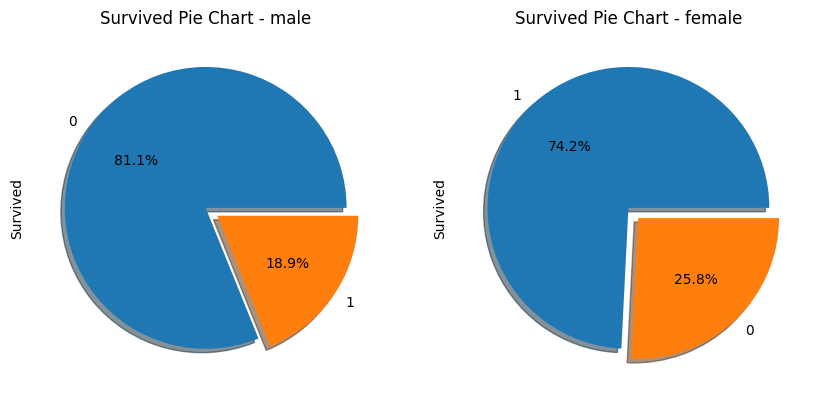

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
df_male['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, ax=axes[0])
axes[0].set_title('Survived Pie Chart - male')
df_female['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, ax=axes[1])
axes[1].set_title('Survived Pie Chart - female')

남성 중 81.1%는 사망한 반면,

여성은 74.2%가 생존하였다.

<Axes: xlabel='Pclass'>

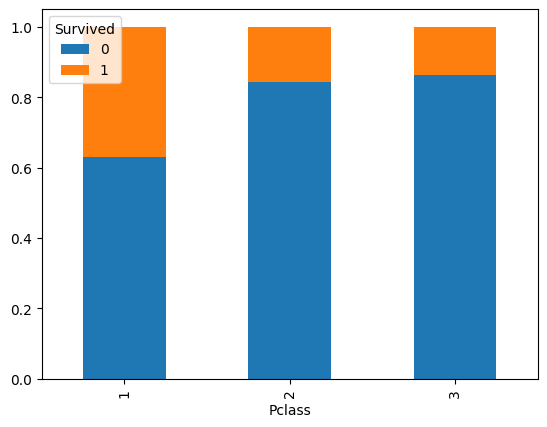

In [ ]:
#남성의 객실등급별 생존유무비율
survived_ratio_by_pclass = df_male.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
survived_ratio_by_pclass.plot(kind='bar', stacked=True)

여기서도 볼 수 있듯이 남성은 사망자의 비율이 월등하게 크다.

그러나, 2-3등급 객실에 비해 1등급객실은 비교적 많이 생존하였다.

<Axes: xlabel='Pclass'>

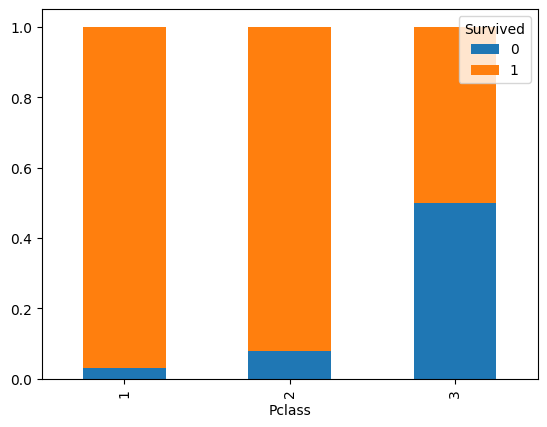

In [ ]:
#여성의 객실등급별 생존유무비율
survived_ratio_by_pclass = df_female.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack()
survived_ratio_by_pclass.plot(kind='bar', stacked=True)

여성은 대체적으로 많이 생존하였다.

1,2등급 객실의 여성은 거의다 생존을 하였으나, 3등급 객실의 여성은 반정도밖에 생존하지 못하였다.

*타이타닉 탑승자의 객실 등급과 나이에 따른 생존 여부*

<Axes: xlabel='Pclass', ylabel='Age'>

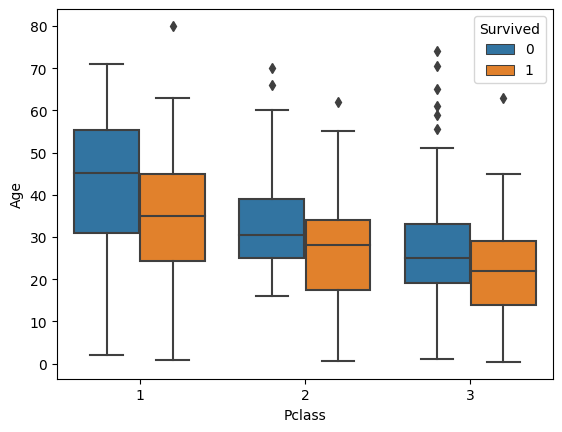

In [ ]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train)

1등급 객실이 가장 생존자가 많음을 알 수 있다.

*탑승 항구와 나이에 따른 생존 여부*

<Axes: xlabel='Embarked', ylabel='Age'>

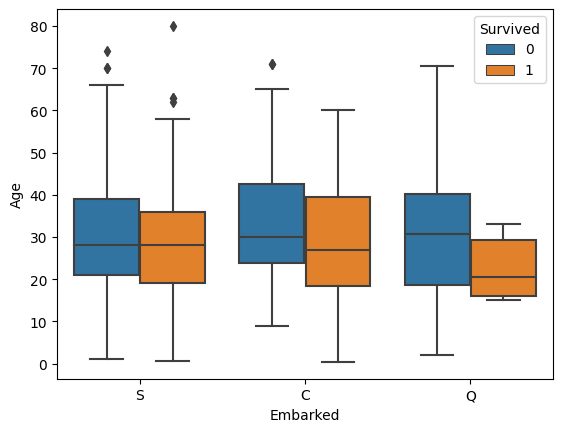

In [ ]:
sns.boxplot(x='Embarked', y='Age', hue='Survived', data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

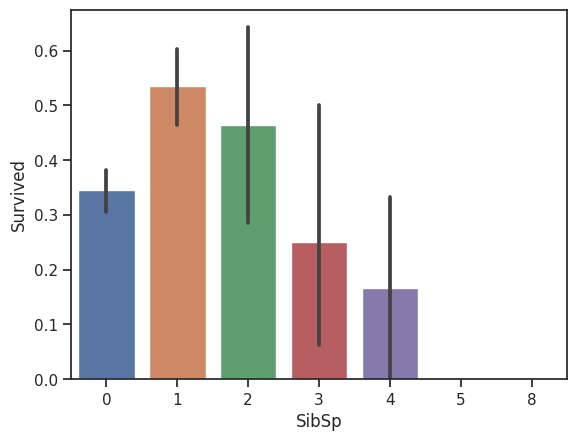

In [ ]:
#형제,배우자의 수에 따른 생존여부
sns.barplot(x='SibSp',y='Survived' ,data=train)

함께 탑승한 형제,배우자의 수가 많을 수록 생존율은 떨어지는 것을 알 수 있다.

<Axes: xlabel='Parch', ylabel='Survived'>

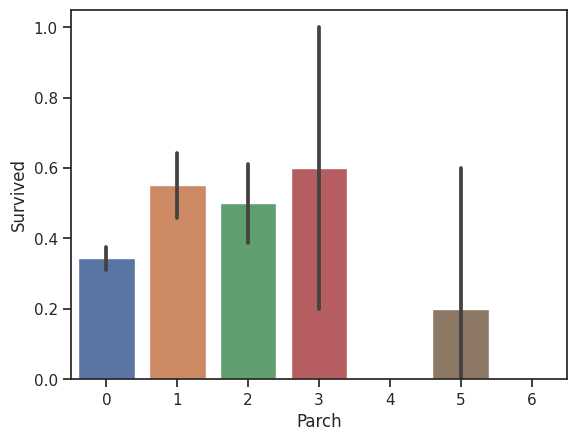

In [ ]:
sns.barplot(x='Parch',y='Survived' ,data=train)

이거는 모르겠다.

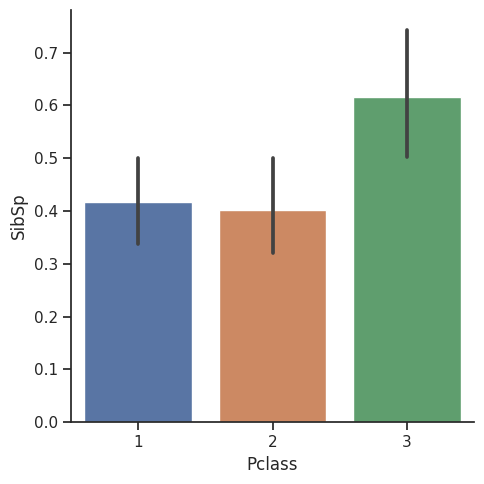

In [ ]:
#형제나 배우자의 수에 따른 객실등급
sns.catplot(x='Pclass', y='SibSp', data=train, kind='bar')

함께 탑승한 형제,배우자의 수가 많을수록 3등석에 많이 탑승하였다.

### **공분산과 상관성 분석**을 통해,

생존에 영향을 주는 변수와, 영향을 주지 않는 변수를 알아보도록 한다.

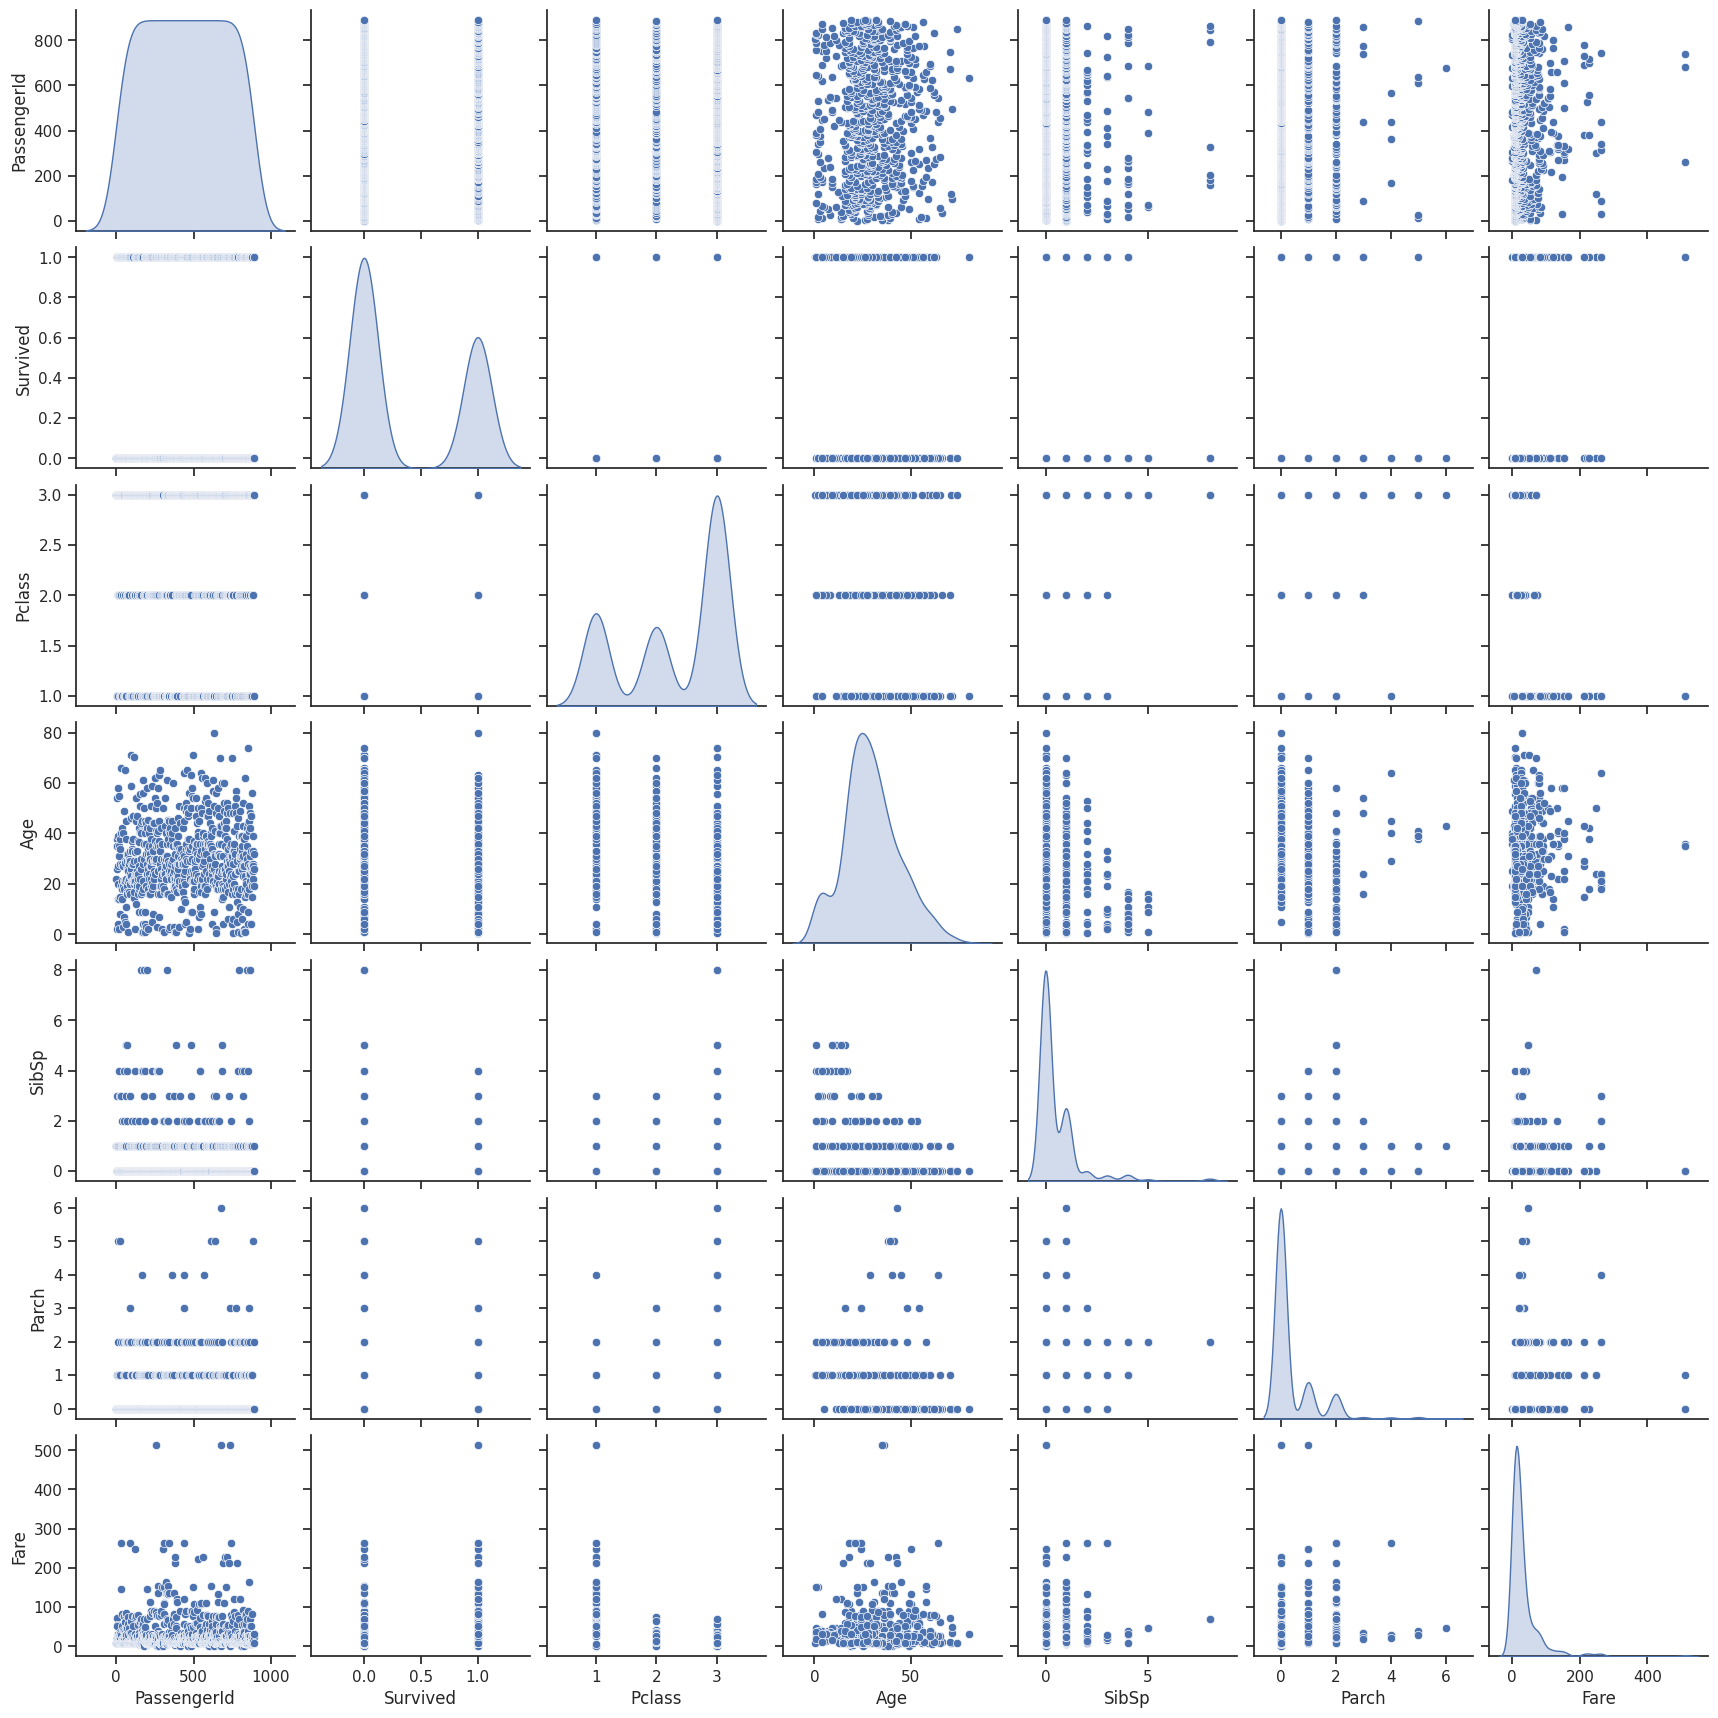

In [ ]:
#산점도 행렬 시각화
sns.set(font_scale=1)
sns.set_style('ticks')
sns.pairplot(train, diag_kind='kde')
plt.show()

In [ ]:
#공분산 확인
train.cov()

<ipython-input-78-a40afcfdf7fa>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.cov()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


공분산은각 변수 간의 다른 척도기준이 그대로 반영되어 직관적으로 상관성의 높고 낮음을 파악하기 힘들다.

동일 변수를 제외하고 봤을 때, Pclass와 Fare변수가 -22.83 / Age와 Fare변수가 73.85로 비교적 높은 공분산을 보이는 것이 눈에 띈다.

그러나, 공분산으로는 변수간 상관성을 분석하기에 가독성이 떨어진다.

In [ ]:
#피어슨 상관계수 확인
train.corr(method='pearson')

<ipython-input-79-024d36be31d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr(method='pearson')


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-89-577b15d2b2b4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(train.corr(), annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax=1, figsize=(6,6))


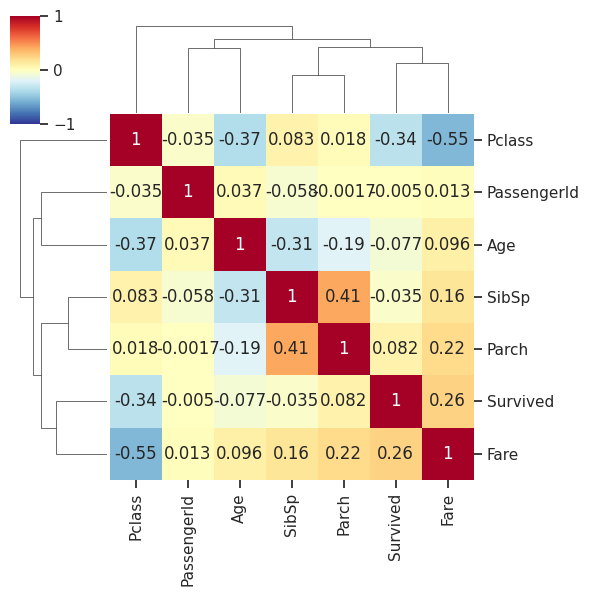

In [ ]:
#상관계수 히트맵 시각화
sns.clustermap(train.corr(), annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax=1, figsize=(6,6))

Fare(탑승요금)과 생존 관계는 0.26으로 약한 양의 상관관계를, 반대로 Age(나이)와 객실 등급은 각각 생존과 -0.37, -0.34로 음의 상관관계를 보였다.

즉, 비싼 표를 샀거나 어릴수록 생존할 확률이 높다.